In [321]:
import pandas as pd

In [322]:
price_countries = pd.read_csv('https://github.com/iggoncharov/pandass/blob/main/netflix%20price%20in%20different%20countries.csv?raw=true')

In [323]:
price_countries.head(4)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54


In [324]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita')[1]
df

Country/Territory           Subregion  Region    IMF[5]          \
              Country/Territory           Subregion  Region  Estimate    Year   
0               Liechtenstein *      Western Europe  Europe       NaN     NaN   
1                  Luxembourg *      Western Europe  Europe  122740.0  2021.0   
2                      Monaco *      Western Europe  Europe       NaN     NaN   
3                   Singapore *  South-eastern Asia    Asia  102742.0  2021.0   
4                     Ireland *     Northern Europe  Europe   99239.0  2021.0   
..                          ...                 ...     ...       ...     ...   
223                    Malawi *      Eastern Africa  Africa    1005.0  2021.0   
224                  DR Congo *       Middle Africa  Africa    1132.0  2021.0   
225  Central African Republic *       Middle Africa  Africa    1013.0  2021.0   
226                   Somalia *      Eastern Africa  Africa     941.0  2021.0   
227                   Burundi *      Eastern Africa  Africa     772.0  2021.0   

    World Bank[6]            CIA[7]          
         Estimate    Year  Estimate    Year  
0             NaN     NaN  139100.0  2009.0  
1        118360.0  2020.0  114482.0  2019.0  
2             NaN     NaN  115700.0  2015.0  
3         98526.0  2020.0   97341.0  2019.0  
4         93612.0  2020.0   86781.0  2019.0  
..            ...     ...       ...     ...  
223        1568.0  2020.0    1060.0  2019.0  
224        1131.0  2020.0    1098.0  2019.0  
225         979.6  2020.0     945.0  2019.0  
226         875.2  2020.0       NaN     NaN  
227         771.2  2020.0     752.0  2019.0  

[228 rows x 9 columns]

In [325]:
country_ppp = pd.merge(df['Country/Territory'], df['CIA[7]']['Estimate'], left_index = True, right_index = True)

In [326]:
country_ppp.rename(columns = {'Country/Territory' : 'Country', 'Estimate' : 'GDP (PPP) per capita'}, inplace= True)

In [327]:
country_ppp['Country'][2]

'Monaco\u202f*'

In [328]:
country_ppp['Country'] = country_ppp['Country'].apply(lambda country: country.replace('\u202f*', ''))
country_ppp

,Country,GDP (PPP) per capita
0,Liechtenstein,139100.0
1,Luxembourg,114482.0
2,Monaco,115700.0
3,Singapore,97341.0
4,Ireland,86781.0
...,...,...
223,Malawi,1060.0
224,DR Congo,1098.0
225,Central African Republic,945.0
226,Somalia,NaN


In [329]:
country_price_ppp = pd.merge(price_countries, country_ppp, left_on = 'Country', right_on = 'Country')
country_price_ppp

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GDP (PPP) per capita
0,Argentina,4760,3154,1606,3.74,6.30,9.26,22064.0
1,Austria,5640,3779,1861,9.03,14.67,20.32,56188.0
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,8724.0
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,23174.0
4,Chile,4994,3156,1838,7.07,9.91,12.74,24226.0
...,...,...,...,...,...,...,...,...
59,Ireland,6486,4515,1971,9.03,14.67,20.32,86781.0
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,68628.0
61,Australia,6114,4050,2064,7.84,12.12,16.39,49854.0
62,Denmark,4558,2978,1580,12.00,15.04,19.60,57804.0


In [330]:
for i in price_countries['Country']:
    if i not in country_ppp['Country'].unique():
        print(i)

Czechia


In [331]:
che = pd.DataFrame([['Czechia', 38509]], index=[1], columns=country_ppp.columns)
#che.set_value('Czechia', 38509)
che

,Country,GDP (PPP) per capita
1,Czechia,38509


In [332]:
che = price_countries[price_countries['Country'] == 'Czechia'].merge(che)

In [333]:
che

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GDP (PPP) per capita
0,Czechia,7325,5234,2091,8.83,11.49,14.15,38509


In [334]:
country_price_ppp = pd.concat([country_price_ppp, che])

In [335]:
country_price_ppp.reset_index(drop = True, inplace = True)

In [336]:
country_price_ppp

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GDP (PPP) per capita
0,Argentina,4760,3154,1606,3.74,6.30,9.26,22064.0
1,Austria,5640,3779,1861,9.03,14.67,20.32,56188.0
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,8724.0
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,23174.0
4,Chile,4994,3156,1838,7.07,9.91,12.74,24226.0
...,...,...,...,...,...,...,...,...
60,Switzerland,5506,3654,1852,12.88,20.46,26.96,68628.0
61,Australia,6114,4050,2064,7.84,12.12,16.39,49854.0
62,Denmark,4558,2978,1580,12.00,15.04,19.60,57804.0
63,United States,5818,3826,1992,8.99,13.99,17.99,62530.0


In [337]:
country_price_ppp['GDP (PPP) per capita'].corr(country_price_ppp['Cost Per Month - Basic ($)'])

0.561042575335834

In [338]:
country_price_ppp['GDP (PPP) per capita'].corr(country_price_ppp['Cost Per Month - Standard ($)'])

0.6673671809897662

In [339]:
country_price_ppp['GDP (PPP) per capita'].corr(country_price_ppp['Cost Per Month - Premium ($)'])

0.6885267212958542

In [340]:
%matplotlib inline  
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cost Per Month - Basic ($)')

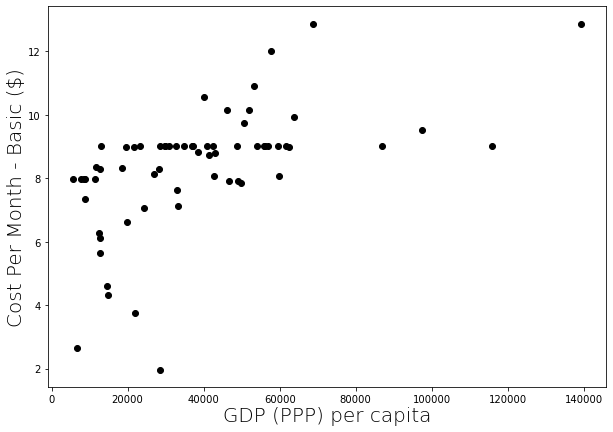

In [341]:
fig = plt.figure(figsize=(10, 7)) # figsize=(8, 6) - размер figure
ax = fig.add_subplot(1, 1, 1)
ax.scatter(country_price_ppp['GDP (PPP) per capita'],country_price_ppp['Cost Per Month - Basic ($)'], color = 'black')

plt.xlabel('GDP (PPP) per capita',     # остальное https://matplotlib.org/3.1.0/api/text_api.html#matplotlib.text.Text
           size = 20, # размер шрифта
           fontweight = 1, # толщина шрифта от 1 до 1000
           labelpad = 2) # расстояние надписи от графика 
plt.ylabel('Cost Per Month - Basic ($)', size = 20, # размер шрифта
           fontweight = 1, # толщина шрифта от 1 до 1000
           labelpad = 2)

Text(0, 0.5, 'Cost Per Month - Standard ($)')

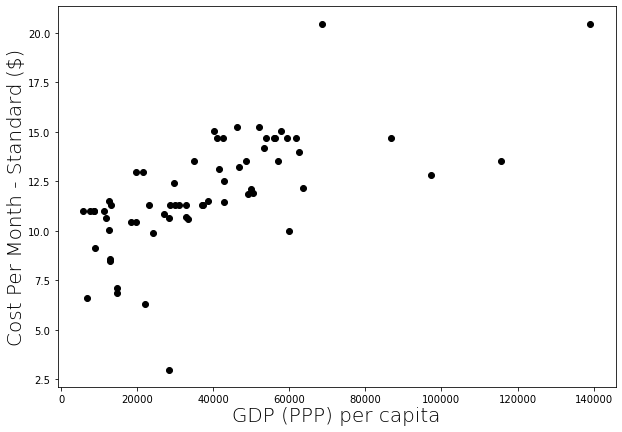

In [342]:
fig = plt.figure(figsize=(10, 7)) # figsize=(8, 6) - размер figure
ax = fig.add_subplot(1, 1, 1)
ax.scatter(country_price_ppp['GDP (PPP) per capita'],country_price_ppp['Cost Per Month - Standard ($)'], color = 'black')

plt.xlabel('GDP (PPP) per capita',     # остальное https://matplotlib.org/3.1.0/api/text_api.html#matplotlib.text.Text
           size = 20, # размер шрифта
           fontweight = 1, # толщина шрифта от 1 до 1000
           labelpad = 2) # расстояние надписи от графика 
plt.ylabel('Cost Per Month - Standard ($)', size = 20, # размер шрифта
           fontweight = 1, # толщина шрифта от 1 до 1000
           labelpad = 2)

Text(0, 0.5, 'Cost Per Month - Premium ($)')

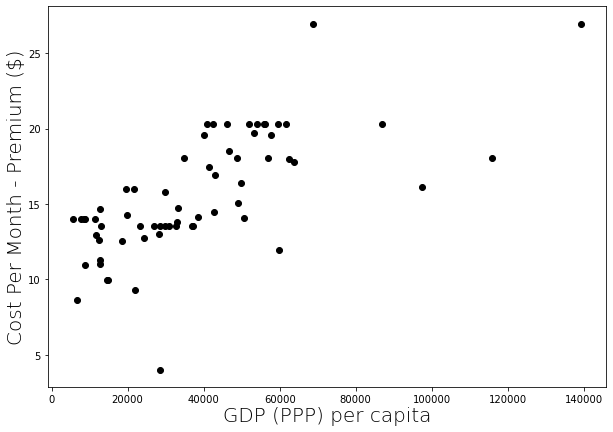

In [343]:
fig = plt.figure(figsize=(10, 7)) # figsize=(8, 6) - размер figure
ax = fig.add_subplot(1, 1, 1)
ax.scatter(country_price_ppp['GDP (PPP) per capita'],country_price_ppp['Cost Per Month - Premium ($)'], color = 'black')

plt.xlabel('GDP (PPP) per capita',     # остальное https://matplotlib.org/3.1.0/api/text_api.html#matplotlib.text.Text
           size = 20, # размер шрифта
           fontweight = 1, # толщина шрифта от 1 до 1000
           labelpad = 2) # расстояние надписи от графика 
plt.ylabel('Cost Per Month - Premium ($)', size = 20, # размер шрифта
           fontweight = 1, # толщина шрифта от 1 до 1000
           labelpad = 2)

### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [344]:
currency = pd.read_csv('https://github.com/iggoncharov/pandass/blob/main/file.csv?raw=true')
currency

,Unnamed: 0,Country,Mobile,Basic,Standard,Premium,Unnamed: 5
0,0,Argentina,NaN,379.00,639.00,939.00,ARS
1,1,Australia,NaN,10.99,16.99,22.99,AUS
2,2,Austria,NaN,7.99,12.99,17.99,EUR
3,3,Belgium,NaN,8.99,13.49,17.99,EUR
4,4,Bolivia,NaN,7.99,10.99,13.99,USD
...,...,...,...,...,...,...,...
60,60,Ukraine,NaN,4.99,7.49,9.99,EUR
61,61,United Kingdom,NaN,5.99,9.99,13.99,GBP
62,62,United States,NaN,9.99,15.49,19.99,USD
63,63,Uruguay,NaN,8.99,12.99,15.99,USD


In [345]:
pd.merge(price_countries, currency, left_on = 'Country', right_on = 'Country')

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Unnamed: 0,Mobile,Basic,Standard,Premium,Unnamed: 5
0,Argentina,4760,3154,1606,3.74,6.30,9.26,0,NaN,379.00,639.00,939.00,ARS
1,Austria,5640,3779,1861,9.03,14.67,20.32,2,NaN,7.99,12.99,17.99,EUR
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,4,NaN,7.99,10.99,13.99,USD
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,6,NaN,7.99,9.99,11.99,EUR
4,Chile,4994,3156,1838,7.07,9.91,12.74,8,NaN,5940.00,8320.00,10700.00,CLP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Ireland,6486,4515,1971,9.03,14.67,20.32,28,NaN,7.99,12.99,17.99,EUR
59,Switzerland,5506,3654,1852,12.88,20.46,26.96,56,NaN,11.90,18.90,24.90,CHF
60,Australia,6114,4050,2064,7.84,12.12,16.39,1,NaN,10.99,16.99,22.99,AUS
61,Denmark,4558,2978,1580,12.00,15.04,19.60,13,NaN,79.00,99.00,129.00,DKK


In [346]:
price_countries['Country'].nunique()

65

In [347]:
for i in price_countries['Country']:
    if i not in currency['Country'].unique():
        print(i)

Czechia
Liechtenstein


In [348]:
currency = currency.replace({'Country':{'Czech Republic':'Czechia', 'Lietchenstein':'Liechtenstein'}})
currency.rename(columns = {'Unnamed: 5' : 'Currency'}, inplace = True)
currency

,Unnamed: 0,Country,Mobile,Basic,Standard,Premium,Currency
0,0,Argentina,NaN,379.00,639.00,939.00,ARS
1,1,Australia,NaN,10.99,16.99,22.99,AUS
2,2,Austria,NaN,7.99,12.99,17.99,EUR
3,3,Belgium,NaN,8.99,13.49,17.99,EUR
4,4,Bolivia,NaN,7.99,10.99,13.99,USD
...,...,...,...,...,...,...,...
60,60,Ukraine,NaN,4.99,7.49,9.99,EUR
61,61,United Kingdom,NaN,5.99,9.99,13.99,GBP
62,62,United States,NaN,9.99,15.49,19.99,USD
63,63,Uruguay,NaN,8.99,12.99,15.99,USD


In [349]:
cur_counry_price = pd.merge(price_countries, currency, left_on = 'Country', right_on = 'Country')
cur_counry_price

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Unnamed: 0,Mobile,Basic,Standard,Premium,Currency
0,Argentina,4760,3154,1606,3.74,6.30,9.26,0,NaN,379.00,639.00,939.00,ARS
1,Austria,5640,3779,1861,9.03,14.67,20.32,2,NaN,7.99,12.99,17.99,EUR
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,4,NaN,7.99,10.99,13.99,USD
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,6,NaN,7.99,9.99,11.99,EUR
4,Chile,4994,3156,1838,7.07,9.91,12.74,8,NaN,5940.00,8320.00,10700.00,CLP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ireland,6486,4515,1971,9.03,14.67,20.32,28,NaN,7.99,12.99,17.99,EUR
61,Switzerland,5506,3654,1852,12.88,20.46,26.96,56,NaN,11.90,18.90,24.90,CHF
62,Australia,6114,4050,2064,7.84,12.12,16.39,1,NaN,10.99,16.99,22.99,AUS
63,Denmark,4558,2978,1580,12.00,15.04,19.60,13,NaN,79.00,99.00,129.00,DKK


In [350]:
mean_price_Currency = cur_counry_price[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)', 'Currency']].groupby('Currency').mean()

In [351]:
mean_price_Currency.rename(columns = {'Cost Per Month - Basic ($)' : 'Mean Basic', 'Cost Per Month - Standard ($)' : 'Mean Standard', 'Cost Per Month - Premium ($)' : 'Mean Premium'}, inplace= True)

In [352]:
mean_price_Currency

,Mean Basic,Mean Standard,Mean Premium
Currency,,,
ARS,3.740000,6.300000,9.260000
AUS,7.840000,12.120000,16.390000
BRL,4.610000,7.110000,9.960000
CAD,7.910000,11.870000,15.030000
CHF,12.880000,20.460000,26.960000
CLP,7.070000,9.910000,12.740000
COP,4.310000,6.860000,9.930000
CZK,8.830000,11.490000,14.150000
DKK,12.000000,15.040000,19.600000


### 2

In [353]:
continent = country_price_ppp[['Country', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']]

In [354]:
continent['cont'] = continent['Country'].apply(lambda con: 'Europe')
continent

<ipython-input-354-ad5f38abfa11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['cont'] = continent['Country'].apply(lambda con: 'Europe')


,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),cont
0,Argentina,3.74,6.30,9.26,Europe
1,Austria,9.03,14.67,20.32,Europe
2,Bolivia,7.99,10.99,13.99,Europe
3,Bulgaria,9.03,11.29,13.54,Europe
4,Chile,7.07,9.91,12.74,Europe
...,...,...,...,...,...
60,Switzerland,12.88,20.46,26.96,Europe
61,Australia,7.84,12.12,16.39,Europe
62,Denmark,12.00,15.04,19.60,Europe
63,United States,8.99,13.99,17.99,Europe


As - Asya  
Eu - Europe  
A - America  
Af - Africa  
O - Oceania  

In [355]:
continent.head(3)

,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),cont
0,Argentina,3.74,6.30,9.26,Europe
1,Austria,9.03,14.67,20.32,Europe
2,Bolivia,7.99,10.99,13.99,Europe


In [356]:
#A
continent.loc[(continent.Country == 'Argentina') | (continent.Country == 'Bolivia') | (continent.Country == 'Chile') | 
              (continent.Country == 'Colombia') | (continent.Country == 'Ecuador') | (continent.Country == 'Costa Rica') |
              (continent.Country == 'Guatemala') | (continent.Country == 'Honduras') | (continent.Country == 'Mexico') |
              (continent.Country == 'Paraguay') | (continent.Country == 'Peru') | (continent.Country == 'Uruguay') | 
              (continent.Country == 'Venezuela') | (continent.Country == 'Brasil'), 'cont'] = 'A'

C:\Users\rimbb\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [357]:
#As
continent.loc[(continent.Country == 'Hong Kong') | (continent.Country == 'India') | (continent.Country == 'Indonesia') | 
              (continent.Country == 'Israel') | (continent.Country == 'Japan') | (continent.Country == 'Malaysia') |
              (continent.Country == 'Philippines') | (continent.Country == 'Singapore') | (continent.Country == 'South Korea') |
              (continent.Country == 'Taiwan') | (continent.Country == 'Thailand'), 'cont'] = 'As'

C:\Users\rimbb\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#As  
Hong Kong  
India  
Indonesia  
Israel  
Japan  
Malaysia  
Philippines  
Singapore  
South Korea  
Taiwan  
Thailand  

In [358]:
#O
continent.loc[(continent.Country == 'Australia') | (continent.Country == 'New Zealand'), 'cont'] = 'O'

C:\Users\rimbb\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [359]:
#Af
continent.loc[(continent.Country == 'South Africa'), 'cont'] = 'Af'

C:\Users\rimbb\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#O  
Australia  
New Zealand  

#AF  
South Africa

#A  
Bolivia  
Chile  
Colombia  
Ecuador  
Costa Rica  
Guatemala  
Honduras  
Mexico  
Paraguay  
Peru  
Uruguay  
Venezuela  
Brasil  

In [360]:
continent.groupby('cont').mean().sort_values('Cost Per Month - Basic ($)')

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
cont,,,
Af,6.260000,10.050000,12.580000
A,7.236154,10.344615,13.369231
As,8.151818,11.077273,13.780000
O,8.320000,12.325000,16.665000
Europe,8.876579,12.850526,16.935526


### 3

In [361]:
country_price_ppp.head(3)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),GDP (PPP) per capita
0,Argentina,4760,3154,1606,3.74,6.30,9.26,22064.0
1,Austria,5640,3779,1861,9.03,14.67,20.32,56188.0
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,8724.0


In [362]:
country_price_ppp['percent subscription Basic from PPP, %'] = country_price_ppp['Cost Per Month - Basic ($)']*12*100/country_price_ppp['GDP (PPP) per capita']
country_price_ppp['percent subscription Standard PPP, %'] = country_price_ppp['Cost Per Month - Standard ($)']*12*100/country_price_ppp['GDP (PPP) per capita']
country_price_ppp['percent subscription Premium PPP, %'] = country_price_ppp['Cost Per Month - Premium ($)']*12*100/country_price_ppp['GDP (PPP) per capita']

In [363]:
country_price_ppp[country_price_ppp['Country'] == 'Czechia'][['Country','percent subscription Basic from PPP, %', 'percent subscription Standard PPP, %', 'percent subscription Premium PPP, %']]

,Country,"percent subscription Basic from PPP, %","percent subscription Standard PPP, %","percent subscription Premium PPP, %"
64,Czechia,0.275156,0.358046,0.440936


### 4

In [364]:
price_countries.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [365]:
price_countries.sort_values('No. of TV Shows', ascending=False).head(5)[['Country', 'No. of TV Shows']]

,Country,No. of TV Shows
8,Czechia,5234
36,Slovakia,5055
3,Bulgaria,4819
50,Hungary,4802
57,United Kingdom,4551


### 5

In [366]:
country_price_ppp[country_price_ppp['Country'] == 'Russia'][['Country','percent subscription Basic from PPP, %', 'percent subscription Standard PPP, %', 'percent subscription Premium PPP, %']]

,Country,"percent subscription Basic from PPP, %","percent subscription Standard PPP, %","percent subscription Premium PPP, %"
33,Russia,0.360745,0.480994,0.601686


не очень понял что такое доход в этом смысле везде считал что это ввп на душу населения так как в задании было указано PPP, посчитаем ещё то что привычно для обычного россиянина 

https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D1%85%D0%BE%D0%B4%D1%8B_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#:~:text=%D0%9F%D0%BE%20%D0%BE%D1%84%D0%B8%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%20%D0%BE%D1%82%20%D0%A0%D0%BE%D1%81%D1%81%D1%82%D0%B0%D1%82%D0%B0,%D1%82%D1%80%D0%BB%D0%BD%20%D1%80%D1%83%D0%B1%D0%BB%D0%B5%D0%B9%20(%24861%20%D0%BC%D0%BB%D1%80%D0%B4).

In [367]:
russia_sub_persent = pd.DataFrame()

In [368]:
russia_sub_persent['Доля подписки от Дохода Basic'] = country_price_ppp[country_price_ppp['Country'] == 'Russia']['Cost Per Month - Basic ($)']*100/490
russia_sub_persent['Доля подписки от Дохода Standard'] = country_price_ppp[country_price_ppp['Country'] == 'Russia']['Cost Per Month - Standard ($)']*100/490
russia_sub_persent['Доля подписки от Дохода Premium'] = country_price_ppp[country_price_ppp['Country'] == 'Russia']['Cost Per Month - Premium ($)']*100/490

In [369]:
russia_sub_persent

,Доля подписки от Дохода Basic,Доля подписки от Дохода Standard,Доля подписки от Дохода Premium
33,1.659184,2.212245,2.767347


### 6

In [370]:
price_countries.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [371]:
price_countries['Cost Per Title'] = price_countries['Cost Per Month - Basic ($)']/price_countries['Total Library Size']
min_cost_title = price_countries.sort_values('Cost Per Title')

In [372]:
min_cost_title.reset_index(drop = True, inplace = True)
ind_rus = min_cost_title[min_cost_title['Country'] == 'Russia']
ind_rus

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Cost Per Title
25,Russia,5711,3624,2087,8.13,10.84,13.56,0.001424


если отсчитывать от 1 то 25 + 1 = 26 место

### 7 

Будем считать что vpn в разных странах стоят одинаково, можно посчитать с точки зрения просто минимальной цены(так мы и будем делать) или с точки зрения минимальной цены за 1 единицу информации(сериал/фильм)(это посчитано выше), и будем смотреть только на Базовый пакет

In [373]:
price_countries.head(3)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Cost Per Title
0,Argentina,4760,3154,1606,3.74,6.30,9.26,0.000786
1,Austria,5640,3779,1861,9.03,14.67,20.32,0.001601
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,0.001601


In [374]:
price_countries.sort_values('Cost Per Month - Basic ($)')[['Country', 'Cost Per Month - Basic ($)']].head()

,Country,Cost Per Month - Basic ($)
41,Turkey,1.97
19,India,2.64
0,Argentina,3.74
5,Colombia,4.31
59,Brazil,4.61
